In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


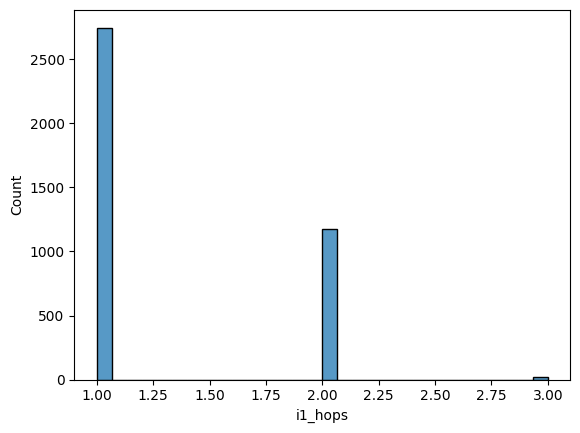

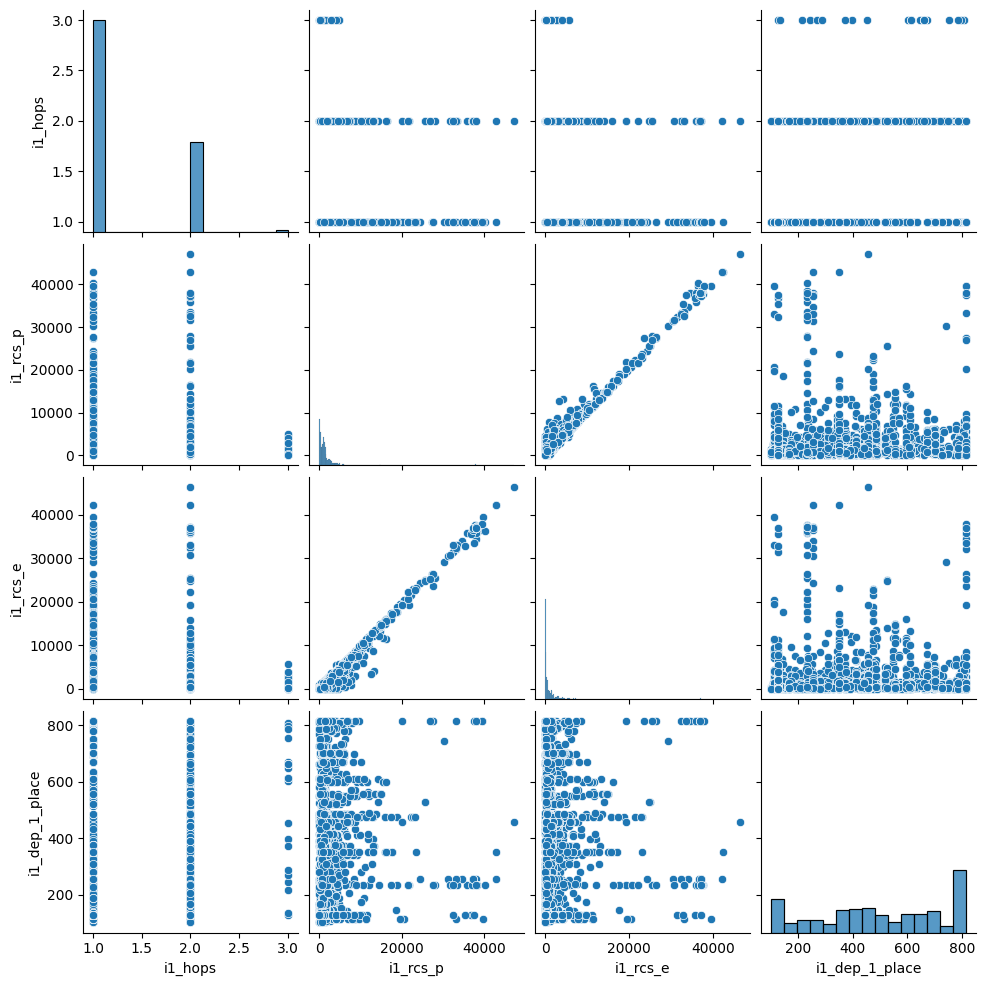

In [9]:
# Data Analysis
data = pd.read_csv('../data/cleaned_c2k_data.csv')  # Load your dataset
sns.histplot(data['i1_hops'], bins=30)
plt.xlabel('i1_hops')
plt.show()

sns.pairplot(data[['i1_hops', 'i1_rcs_p', 'i1_rcs_e', 'i1_dep_1_place']])
plt.show()


In [10]:
# Convert categorical variables to dummy variables
data_encoded = pd.get_dummies(data)

# Separating the features and the target variable
X = data_encoded.drop('i1_hops', axis=1)
y = data_encoded['i1_hops']
data = pd.read_csv('../data/cleaned_c2k_data.csv')  # Load your dataset
data.replace('?', np.nan, inplace=True)
data.ffill(inplace=True)  # Forward fill NaN values


In [11]:
# Model Selection
model = RandomForestRegressor()


In [12]:
# Model Training
X = data_encoded.drop('i1_hops', axis=1)
y = data_encoded['i1_hops']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor()

In [13]:
# Model Testing and Evaluation
predictions = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: {rmse}")


RMSE: 0.023874495741577958


In [14]:
data = pd.read_csv('../data/cleaned_c2k_data.csv')  # Load your dataset
future_data_example = pd.DataFrame([{
    'nr': '400',  # Replace with appropriate identifier
    'i1_legid':'legid1', 'i2_legid': 'legid2', 'i3_legid': 'legid3', 'o_legid': 'olegid',  # Replace with leg IDs
    'i1_rcs_p': 200, 'i2_rcs_p': 150,  # Replace with estimated planned durations
    'i1_rcs_e': 180, 'i2_rcs_e': 140,  # Replace with estimated actual durations
    'i1_dep_1_place': 'airport_id1', 'i2_dep_1_place': 'airport_id2',  # Replace with airport IDs
    # Add other columns as needed, filling with estimates or placeholders
    'legs': 3  # Replace with the number of legs
}])

# Use the model to make a prediction
future_prediction = model.predict(future_data_example)
print("Future Prediction: ", future_prediction)


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- i1_dep_1_e
- i1_dep_1_p
- i1_dep_2_e
- i1_dep_2_p
- i1_dep_2_place
- ...


In [15]:
from sklearn.experimental import enable_hist_gradient_boosting  # Required for HistGradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

# Create the model
model = HistGradientBoostingRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)


C:\Users\weerakorn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


HistGradientBoostingRegressor()

In [16]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Making predictions
predictions = model.predict(X_test)

# Evaluating the model
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE: {rmse}')


RMSE: 0.08178824975457324


In [17]:
# Model Testing and Evaluation
# Using the pipeline for predictions, which includes the imputer
predictions = model_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE: {rmse}')


NameError: name 'model_pipeline' is not defined